##### Copyright 2019 The TensorFlow Authors.

# Convolutional Neural Network (CNN)

In [26]:
import cv2
import numpy as np
import pandas as pd 
import json
import glob
import os
from PIL import Image
import scipy

In [27]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut,KFold
import tensorflow_hub as hub


In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import cross_val_score


In [29]:
# import images
#change user
# path = "C:\\Users\\amart50\\Documents\\Lifting data\\Data"
path ='C:\\Users\\amart50\\Desktop\\CNN_test\\data'
deadlift = path + "\\Deadlift"
bench = path + "\\Bench"
squats = path + "\\Squat"

In [30]:
# # Convert deadlift to jpg
# pos_paths_list = [deadlift, bench, squats]

# for pos_paths in pos_paths_list:
#     for file in os.listdir(pos_paths):
#         # check the files which are end with specific extension
#         if file.endswith(".png"):
#             # print path name of selected files
#             file_path = os.path.join(pos_paths, file)
#             # print(file_path)
#             im = Image.open(file_path)
#             new_name = file.split(".")[0] + ".jpg"
#             # im.save(new_name)
#             Image.open(file_path).convert('RGB').save(pos_paths+"\\"+new_name)


#     for file in os.listdir(pos_paths):
#         # check the files which are end with specific extension
#         if file.endswith(".jpeg"):
#             # print path name of selected files
#             file_path = os.path.join(pos_paths, file)
#             # print(file_path)
#             im = Image.open(file_path)
#             new_name = file.split(".")[0] + ".jpg"
#             # im.save(new_name)
#             Image.open(file_path).convert('RGB').save(pos_paths+"\\"+new_name)


In [31]:
# # check
# im = image.load_img(bench+"\\1.jpg")
# plt.imshow(im)
# # np.max( cv2.imread(bench+"\\99.jpg").flatten() )
# cv2.imread(bench+"\\99.jpg").shape

In [33]:
# normalise the pixel values
train_ = ImageDataGenerator(validation_split = .2, rescale=1./255)
TRAIN_DIR = path


train_dataset = train_.flow_from_directory(
    TRAIN_DIR,
    target_size = (224, 224),
    subset='training',
    batch_size = 10,
    class_mode='categorical'
)

validation_dataset = train_.flow_from_directory(
    TRAIN_DIR,
    target_size = (224, 224),
    subset='validation',
    class_mode='categorical',
    batch_size = 10,
)

Found 841 images belonging to 3 classes.
Found 209 images belonging to 3 classes.


In [34]:
# train_dataset.shape
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor_model = mobilenet_v2
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape=(224, 224, 3),
    trainable=False)


In [35]:
num_classes = 3

model = tf.keras.models.Sequential([
#   tf.keras.layers.Rescaling(1./255),
feature_extractor_layer,
# tf.keras.layers.Conv2D(16, (3,3), input_shape=(256,256,3), activation='relu'),
# tf.keras.layers.MaxPooling2D(2,2),

# tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
# tf.keras.layers.MaxPooling2D(2,2),

# tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
# tf.keras.layers.MaxPooling2D(2,2),

# tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
# tf.keras.layers.MaxPooling2D(2,2),

# tf.keras.layers.Flatten(),
# tf.keras.layers.Dense(128*4, activation='relu'),
tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [36]:
# source: https://stackoverflow.com/questions/57301698/how-to-change-a-learning-rate-for-adam-in-tf2
# to reduce lr each run
# model.fit(x_train, y_train, callbacks=[LearningRateReducerCb()], epochs=5)
class LearningRateReducerCb(tf.keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs={}):
    old_lr = self.model.optimizer.lr.read_value()
    new_lr = old_lr * 0.99
    print("\nEpoch: {}. Reducing Learning Rate from {} to {}".format(epoch, old_lr, new_lr))
    self.model.optimizer.lr.assign(new_lr)

In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
kfold = KFold(n_splits=10, shuffle=True)

In [38]:
# model_fit = model.fit(train_dataset, epochs=5)
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [39]:
epochs=10
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

Epoch 1/10
85/85 [==============================] - 21s 206ms/step - loss: 0.8532 - accuracy: 0.6219 - val_loss: 0.5672 - val_accuracy: 0.7990
Epoch 2/10
85/85 [==============================] - 17s 199ms/step - loss: 0.4628 - accuracy: 0.8478 - val_loss: 0.4723 - val_accuracy: 0.8373
Epoch 3/10
85/85 [==============================] - 17s 193ms/step - loss: 0.3474 - accuracy: 0.8894 - val_loss: 0.4304 - val_accuracy: 0.8469
Epoch 4/10
85/85 [==============================] - 17s 197ms/step - loss: 0.2664 - accuracy: 0.9263 - val_loss: 0.3748 - val_accuracy: 0.8565
Epoch 5/10
85/85 [==============================] - 16s 193ms/step - loss: 0.2219 - accuracy: 0.9512 - val_loss: 0.3594 - val_accuracy: 0.8612
Epoch 6/10
85/85 [==============================] - 17s 195ms/step - loss: 0.1819 - accuracy: 0.9584 - val_loss: 0.3152 - val_accuracy: 0.8852
Epoch 7/10
85/85 [==============================] - 17s 196ms/step - loss: 0.1593 - accuracy: 0.9655 - val_loss: 0.3787 - val_accuracy: 0.8612

In [41]:
# model.fit(x_train, y_train, callbacks=[LearningRateReducerCb()], epochs=5)
model.evaluate(validation_dataset)

21/21 [==============================] - 3s 156ms/step - loss: 0.3939 - accuracy: 0.8708


[0.39388173818588257, 0.8708133697509766]

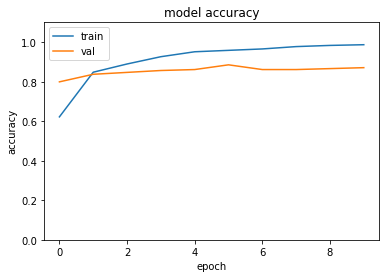

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
# plt.scale()
plt.ylim([0,1.1])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [43]:
tf.keras.models.save_model(model,'my_model.hdf5')

In [47]:
image = cv2.imread("C:\\Users\\amart50\\Downloads\\test.jpg")
image = tf.image.resize(image, (224, 224))  # Resize the image
image = tf.keras.applications.mobilenet_v2.preprocess_input(image)  # Pre-process the image for the model
image = image[None, ...]  # Add a batch dimension to the image

# Use the model to classify the image
predictions = model.predict(image)

1/1 [==============================] - 1s 577ms/step


In [58]:
predictions[0]

array([9.1010571e-01, 7.3406508e-04, 8.9160256e-02], dtype=float32)

In [62]:
tf.nn.softmax(predictions)[0, tf.argmax(predictions[0])]

<tf.Tensor: shape=(), dtype=float32, numpy=0.54265463>

In [68]:
f = tf.argmax([1,2], axis = 0)
f

<tf.Tensor: shape=(), dtype=int64, numpy=1>

In [40]:

# # Define a function to create the model
# def create_model():
#   # Build the model
#   model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(10, activation='softmax')
#   ])

#   # Compile the model
#   model.compile(
#     optimizer='adam',
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
#   )

#   return model

# # Load the data
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# # Create a list of k models
# k = 5
# models = [create_model() for _ in range(k)]

# # Define a function to evaluate the models
# def evaluate_model(model, x, y):
#   # Evaluate the model on the provided data
#   return model.evaluate(x, y, verbose=0)

# # Define a function to perform k-fold cross validation
# def k_fold_cross_validation(k, x, y, evaluate_model):
#   # Create a list to store the scores for each fold
#   scores = []

#   # Use the length of x as the number of samples
#   num_samples = len(x)

#   # Split the data into k folds
#   folds = tf.split(x, num_or_size_splits=k)

#   # Loop over the folds
#   for i, fold in enumerate(folds):
#     # Create the training and validation sets for this fold
#     x_train = tf.concat(folds[:i] + folds[i+1:], axis=0)
#     y_train = tf.concat(y[:i*num_samples//k] + y[(i+1)*num_samples//k:], axis=0)
#     x_val = fold
#     # y_val = y[i*num_samples//k:(i+1)*num_samples//k]

#     # Train the model on the training data
#     models[i].fit(x_train, y_train, epochs=10, verbose=0)

#     # Evaluate the model on the validation data
#     scores.append(evaluate_model(models[i], x_val, y_val))

#   return scores

# # Perform k-fold cross validation
# scores = k_fold_cross_validation(k, x_train, y_train, evaluate_